In [87]:
#import library
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#membaca data filenya
df = pd.read_csv('movies_metadata.csv')

C:\Users\windo\AppData\Local\Temp\ipykernel_15872\2941878177.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [89]:
#melihat isi data
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [90]:
#mengambil beberapa data berdasarkan parameternya
df = df[['budget','revenue','runtime','vote_count','vote_average','title']]

In [91]:
df.head()

,budget,revenue,runtime,vote_count,vote_average,title
0,30000000,373554033.0,81.0,5415.0,7.7,Toy Story
1,65000000,262797249.0,104.0,2413.0,6.9,Jumanji
2,0,0.0,101.0,92.0,6.5,Grumpier Old Men
3,16000000,81452156.0,127.0,34.0,6.1,Waiting to Exhale
4,0,76578911.0,106.0,173.0,5.7,Father of the Bride Part II


In [92]:
#melihat data apakah ada yang kosong
df.isna().sum()

budget            0
revenue           6
runtime         263
vote_count        6
vote_average      6
title             6
dtype: int64

In [93]:
#menghapus data yag kosong
df.dropna(inplace=True)

In [94]:
#cek ulang data
df.isna().sum()

budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
title           0
dtype: int64

In [95]:
#melihat distribusi data pada total voting
df['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [96]:
#membuat variabel baru untuk menampung data df baru yang datanya lebih dari 30 dimana 
# data yang votenya dibawah 30 tidak dipakai
df2 = df[df['vote_count'] > 30]

In [97]:
#melihat reduksi data (baru) 
len(df), len(df2)

(45203, 12178)

In [98]:
#melihat 5 data teratas pada df2
df2.head() 

,budget,revenue,runtime,vote_count,vote_average,title
0,30000000,373554033.0,81.0,5415.0,7.7,Toy Story
1,65000000,262797249.0,104.0,2413.0,6.9,Jumanji
2,0,0.0,101.0,92.0,6.5,Grumpier Old Men
3,16000000,81452156.0,127.0,34.0,6.1,Waiting to Exhale
4,0,76578911.0,106.0,173.0,5.7,Father of the Bride Part II


In [99]:
#memberi skala pada data maksimum dan minimum antara 0 dan 1 (tidak mengikutsertakan title)
minmax=preprocessing.MinMaxScaler().fit_transform(df2.drop('title', axis=1))

In [100]:
#karena proses preposesing membuat data menjadi array, maka perlu diubah kembali ke data frame pandas
df3 = pd.DataFrame(minmax, index=df2.index, columns=df2.columns[:-1])

In [101]:
df3

,budget,revenue,runtime,vote_count,vote_average
0,0.078947,0.133988,0.092360,0.383367,0.810526
1,0.171053,0.094261,0.118586,0.169610,0.726316
2,0.000000,0.000000,0.115165,0.004343,0.684211
3,0.042105,0.029216,0.144812,0.000214,0.642105
4,0.000000,0.027468,0.120867,0.010111,0.600000
...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053
45373,0.000000,0.000000,0.094641,0.000498,0.631579
45380,0.000000,0.000000,0.094641,0.000427,0.652632
45437,0.000000,0.000000,0.004561,0.008189,0.873684


In [102]:
#untuk menebak berapa cluster, untuk tahu berapa clustering yang bisa diambil
#menghitung skor
KMeans(n_clusters=2).fit(df3).score(df3)
#skor dengan 2 cluster sebagai berikut

-198.57753526274212

In [103]:
#mengiterasikan skor" range 1-20 (looping])
scr=[]
for i in range(1,20):
    score = KMeans(n_clusters=i).fit(df3).score(df3)
    print(score)
    scr.append(score)

-281.0031098516675
-198.57799199589357
-127.33958709124266
-106.07304224497116
-88.2615422518846
-78.83523781627673
-70.61309092035924
-63.36776146650694
-59.47843202147434
-55.7166010077277
-52.96636229770098
-49.58643464090919
-47.19859452650636
-45.16842882986502
-43.34210117595474
-41.49464595878657
-40.143930717647365
-38.502193928566136
-37.017835013370465


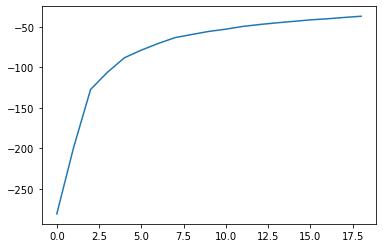

In [104]:
#setelah list score didapat, print dalam bentuk matplotlib
plt.plot(scr)

In [105]:
#mengambil cluster efektif sudut dengan angka cluster 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)


KMeans(n_clusters=5)

In [106]:
#data dengan index tadi akan ada arraynya
kmeans.labels_


array([2, 4, 1, ..., 1, 3, 0])

In [107]:
#membuat kolom baru untuk menunjukan clusternya
df3['cluster'] = kmeans.labels_
df3

,budget,revenue,runtime,vote_count,vote_average,cluster
0,0.078947,0.133988,0.092360,0.383367,0.810526,2
1,0.171053,0.094261,0.118586,0.169610,0.726316,4
2,0.000000,0.000000,0.115165,0.004343,0.684211,1
3,0.042105,0.029216,0.144812,0.000214,0.642105,1
4,0.000000,0.027468,0.120867,0.010111,0.600000,1
...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,1
45373,0.000000,0.000000,0.094641,0.000498,0.631579,1
45380,0.000000,0.000000,0.094641,0.000427,0.652632,1
45437,0.000000,0.000000,0.004561,0.008189,0.873684,3


(array([2273.,    0., 4805.,    0.,    0.,  253.,    0., 3748.,    0.,
        1099.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

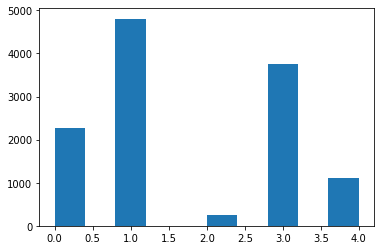

In [109]:
#menampilkan pembagian cluster dalam bentuk histogram
plt.hist(df3['cluster'])

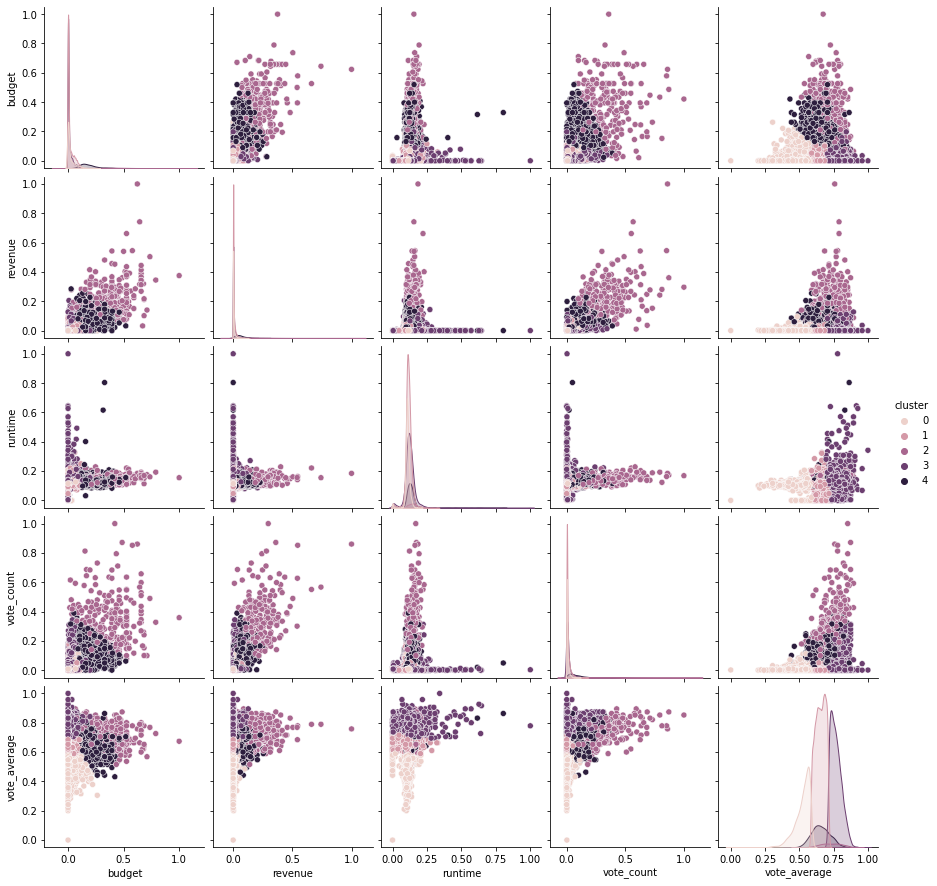

In [110]:
#membuat analisa pairplot dan menampilkanya
sns.pairplot(df3,hue='cluster')

In [112]:
#mencoba memasukan title kembali pada data df3
df3['title'] = df2['title']
df3

,budget,revenue,runtime,vote_count,vote_average,cluster,title
0,0.078947,0.133988,0.092360,0.383367,0.810526,2,Toy Story
1,0.171053,0.094261,0.118586,0.169610,0.726316,4,Jumanji
2,0.000000,0.000000,0.115165,0.004343,0.684211,1,Grumpier Old Men
3,0.042105,0.029216,0.144812,0.000214,0.642105,1,Waiting to Exhale
4,0.000000,0.027468,0.120867,0.010111,0.600000,1,Father of the Bride Part II
...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,1,Frankenstein Created Woman
45373,0.000000,0.000000,0.094641,0.000498,0.631579,1,Take Me
45380,0.000000,0.000000,0.094641,0.000427,0.652632,1,The Incredible Jessica James
45437,0.000000,0.000000,0.004561,0.008189,0.873684,3,In a Heartbeat
